Лабораторная работа №1, Научное Программирование

Добрый день! За основу я взяла датасет от Сбербанка:
https://www.kaggle.com/competitions/sberbank-russian-housing-market  
Сам датасет не получилось скачать с кэггла (что-то с аккаунтом), поэтому брала отсюда:  
https://github.com/AdmiralWen/Sberbank-Russian-Housing-Market  
Датасет представляет из себя набор данных об объектах недвижимости (как я поняла, имеется в виду жилая недвижимость).
Ниже скопированы описания параметров:

In [191]:
# price_doc: sale price (this is the target variable)
# id: transaction id
# timestamp: date of transaction
# full_sq: total area in square meters, including loggias, balconies and other non-residential areas
# life_sq: living area in square meters, excluding loggias, balconies and other non-residential areas
# floor: for apartments, floor of the building
# max_floor: number of floors in the building
# material: wall material
# build_year: year built
# num_room: number of living rooms
# kitch_sq: kitchen area
# state: apartment condition
# product_type: owner-occupier purchase or investment
# sub_area: name of the district

# The dataset also includes a collection of features about each property's surrounding neighbourhood,
# and some features that are constant across each sub area (known as a Raion).
# Most of the feature names are self explanatory, with the following notes. See below for a complete list.

# full_all: subarea population
# male_f, female_f: subarea population by gender
# young_*: population younger than working age
# work_*: working-age population
# ekder_*: retirement-age population
# n_m_{all|male|female}: population between n and m years old
# build_count_*: buildings in the subarea by construction type or year
# x_count_500: the number of x within 500m of the property
# x_part_500: the share of x within 500m of the property
# _sqm_: square meters
# cafe_count_d_price_p: number of cafes within d meters of the property that have an average bill under p RUB
# trc_: shopping malls
# prom_: industrial zones
# green_: green zones
# metro_: subway
# _avto_: distances by car
# mkad_: Moscow Circle Auto Road
# ttk_: Third Transport Ring
# sadovoe_: Garden Ring
# bulvar_ring_: Boulevard Ring
# kremlin_: City center
# zd_vokzaly_: Train station
# oil_chemistry_: Dirty industry
# ts_: Power plant

Импортируем библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

Импортируем датасет:

In [2]:
train = pd.read_csv('sber.csv')
train

id   timestamp  full_sq  life_sq  floor  max_floor  material  \
0        1  2011-08-20       43     27.0    4.0        NaN       NaN   
1        2  2011-08-23       34     19.0    3.0        NaN       NaN   
2        3  2011-08-27       43     29.0    2.0        NaN       NaN   
3        4  2011-09-01       89     50.0    9.0        NaN       NaN   
4        5  2011-09-05       77     77.0    4.0        NaN       NaN   
...    ...         ...      ...      ...    ...        ...       ...   
6902  6905  2013-03-30       88     79.0    4.0        NaN       NaN   
6903  6906  2013-03-30       76     32.0    9.0        NaN       NaN   
6904  6907  2013-03-30      106     54.0    9.0        NaN       NaN   
6905  6908  2013-04-01       79      NaN   17.0        NaN       NaN   
6906  6909  2013-04-01       83     83.0    5.0        NaN       NaN   

      build_year  num_room  kitch_sq  ...  cafe_count_5000_price_2500  \
0            NaN       NaN       NaN  ...                         9.0   
1            NaN       NaN       NaN  ...                        15.0   
2            NaN       NaN       NaN  ...                        10.0   
3            NaN       NaN       NaN  ...                        11.0   
4            NaN       NaN       NaN  ...                       319.0   
...          ...       ...       ...  ...                         ...   
6902         NaN       NaN       NaN  ...                        14.0   
6903         NaN       NaN       NaN  ...                        33.0   
6904         NaN       NaN       NaN  ...                        13.0   
6905         NaN       NaN       NaN  ...                         1.0   
6906         NaN       NaN       NaN  ...                         NaN   

     cafe_count_5000_price_4000 cafe_count_5000_price_high  \
0                           4.0                        0.0   
1                           3.0                        0.0   
2                           3.0                        0.0   
3                           2.0                        1.0   
4                         108.0                       17.0   
...                         ...                        ...   
6902                        3.0                        0.0   
6903                        6.0                        1.0   
6904                        4.0                        1.0   
6905                        0.0                        0.0   
6906                        NaN                        NaN   

      big_church_count_5000  church_count_5000  mosque_count_5000  \
0                      13.0               22.0                1.0   
1                      15.0               29.0                1.0   
2                      11.0               27.0                0.0   
3                       4.0                4.0                0.0   
4                     135.0              236.0                2.0   
...                     ...                ...                ...   
6902                   11.0               11.0                0.0   
6903                   17.0               34.0                1.0   
6904                    5.0                8.0                0.0   
6905                    4.0                6.0                0.0   
6906                    NaN                NaN                NaN   

      leisure_count_5000  sport_count_5000  market_count_5000   price_doc  
0                    0.0              52.0                4.0   5850000.0  
1                   10.0              66.0               14.0   6000000.0  
2                    4.0              67.0               10.0   5700000.0  
3                    0.0              26.0                3.0  13100000.0  
4                   91.0             195.0               14.0  16331452.0  
...                  ...               ...                ...         ...  
6902                 1.0              56.0                5.0  13583544.0  
6903                13.0              66.0               13.0  11000000.0  
6904    

Визуально видно, что в таблице много пропусков. Как видно, есть целые столбцы без информации:

In [3]:
train['num_room'].isnull().sum()

6907

Уберем те столбцы, которые содержат менее половины значений:

In [4]:
for column in train.columns:
    if train[column].isnull().sum()>0.5*len(column):
        train.drop(column, inplace=True, axis=1)
train

id   timestamp  full_sq   product_type             sub_area  \
0        1  2011-08-20       43     Investment             Bibirevo   
1        2  2011-08-23       34     Investment    Nagatinskij Zaton   
2        3  2011-08-27       43     Investment       Tekstil'shhiki   
3        4  2011-09-01       89     Investment               Mitino   
4        5  2011-09-05       77     Investment            Basmannoe   
...    ...         ...      ...            ...                  ...   
6902  6905  2013-03-30       88  OwnerOccupier     Severnoe Tushino   
6903  6906  2013-03-30       76     Investment   Nagatino-Sadovniki   
6904  6907  2013-03-30      106     Investment               Mitino   
6905  6908  2013-04-01       79  OwnerOccupier           Nekrasovka   
6906  6909  2013-04-01       83  OwnerOccupier  Poselenie Sosenskoe   

            area_m  raion_popul  green_zone_part  indust_part  \
0     6.407578e+06       155572         0.189727     0.000070   
1     9.589337e+06       115352         0.372602     0.049637   
2     4.808270e+06       101708         0.112560     0.118537   
3     1.258354e+07       178473         0.194703     0.069753   
4     8.398461e+06       108171         0.015234     0.037316   
...            ...          ...              ...          ...   
6902  9.249237e+06       156377         0.374068     0.000000   
6903  7.750778e+06        76284         0.094681     0.313925   
6904  1.258354e+07       178473         0.194703     0.069753   
6905  1.139168e+07        19940         0.055644     0.243205   
6906  6.677245e+07         9553         0.336177     0.072158   

      children_preschool  ...  cafe_count_5000_price_2500  \
0                   9576  ...                         9.0   
1                   6880  ...                        15.0   
2                   5879  ...                        10.0   
3                  13087  ...                        11.0   
4                   5706  ...                       319.0   
...                  ...  ...                         ...   
6902               10190  ...                        14.0   
6903                4935  ...                        33.0   
6904               13087  ...                        13.0   
6905                1706  ...                         1.0   
6906                 656  ...                         NaN   

      cafe_count_5000_price_4000  cafe_count_5000_price_high  \
0                            4.0                         0.0   
1                            3.0                         0.0   
2                            3.0                         0.0   
3                            2.0                         1.0   
4                          108.0                        17.0   
...                          ...                         ...   
6902                         3.0                         0.0   
6903                         6.0                         1.0   
6904                         4.0                         1.0   
6905                         0.0                         0.0   
6906                         NaN                         NaN   

      big_church_count_5000  church_count_5000  mosque_count_5000  \
0                      13.0               22.0                1.0   
1                      15.0               29.0                1.0   
2                      11.0               27.0                0.0   
3                       4.0                4.0                0.0   
4                     135.0              236.0                2.0   
...                     ...                ...                ...   
6902                   11.0               11.0                0.0   
6903                   17.0               34.0                1.0   
6904                    5.0                8.0                0.0   
6905                    4.0                6.0                0.0   
6906                    NaN                NaN                NaN   

      leisure_count_5000  sport_count_5000 

Посмотрим на параметры и их тип:

In [196]:
for i in train.columns:
    print (i, train[i].dtypes)

id int64
timestamp object
full_sq int64
product_type object
sub_area object
area_m float64
raion_popul int64
green_zone_part float64
indust_part float64
children_preschool int64
preschool_education_centers_raion int64
children_school int64
school_education_centers_raion int64
school_education_centers_top_20_raion int64
healthcare_centers_raion int64
university_top_20_raion int64
sport_objects_raion int64
additional_education_raion int64
culture_objects_top_25 object
culture_objects_top_25_raion int64
shopping_centers_raion int64
office_raion int64
thermal_power_plant_raion object
incineration_raion object
oil_chemistry_raion object
radiation_raion object
railroad_terminal_raion object
big_market_raion object
nuclear_reactor_raion object
detention_facility_raion object
full_all int64
male_f int64
female_f int64
young_all int64
young_male int64
young_female int64
work_all int64
work_male int64
work_female int64
ekder_all int64
ekder_male int64
ekder_female int64
0_6_all int64
0_6_male in

In [197]:
# пример того, какие значения могут принимать параметры
Counter(train['nuclear_reactor_raion'])

Counter({'no': 6705, 'yes': 202})

In [198]:
Counter(train['nuclear_reactor_raion'])

Counter({'no': 6705, 'yes': 202})

In [199]:
train[train['nuclear_reactor_raion']=='yes']['sub_area']

33      Moskvorech'e-Saburovo
73                Dmitrovskoe
97      Moskvorech'e-Saburovo
115               Dmitrovskoe
130               Golovinskoe
                ...          
6396              Golovinskoe
6439              Dmitrovskoe
6692              Golovinskoe
6709    Moskvorech'e-Saburovo
6729              Dmitrovskoe
Name: sub_area, Length: 202, dtype: object

In [200]:
Counter(train[train['nuclear_reactor_raion']=='yes']['sub_area'])

Counter({"Moskvorech'e-Saburovo": 24,
         'Dmitrovskoe': 42,
         'Golovinskoe': 57,
         'Akademicheskoe': 43,
         'Shhukino': 36})

Гипотеза состоит в том, что какие-то параметры квартир в этой таблице влияют на цену квартиры. Попробуем выбрать эти параметры и доказать их влияние.

Для начала посмотрим на данные в целом.

Самая низкая цена за объект недвижимости составляла 190,000 рублей, самая высокая - 111,111,112 рублей
Средняя цена за объект недвижимости составляла 6,332,322 рублей, медианная цена - 5,650,000 рублей


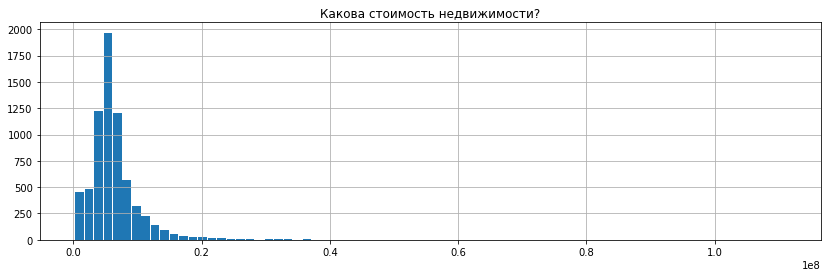

In [201]:
# посмотрим на целевую переменную:
print('Самая низкая цена за объект недвижимости составляла {:,.0f} рублей, самая высокая - {:,.0f} рублей'.format(
    train.price_doc.min(), train.price_doc.max()))
print('Средняя цена за объект недвижимости составляла {:,.0f} рублей, медианная цена - {:,.0f} рублей'.format(
    train.price_doc.mean(), train.price_doc.median()))
train.price_doc.hist(bins=75, rwidth=.9, figsize=(14,4))
plt.title('Какова стоимость недвижимости?')
plt.show()

Самый ближайший объект находится в 0.09 минутах от метро, самый дальний - в 600.32 минутах.


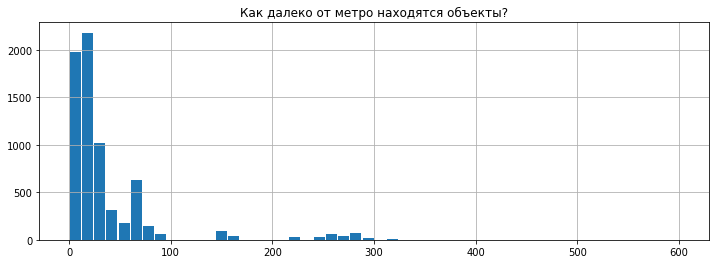

In [202]:
# посмотрим на распределение жилья в зависимости от количества минут пешком до метро
print('Самый ближайший объект находится в {} минутах от метро, самый дальний - в {} минутах.'.format(
    round(train.metro_min_walk.min(),2), round(train.metro_min_walk.max(),2)))
train.metro_min_walk.hist(bins=50, rwidth=.9, figsize=(12,4))
plt.title('Как далеко от метро находятся объекты?')
plt.show()

Большинство жилищ в 0-30 минутах от метро, видимо, это связано с тем, что в Москве много станций.

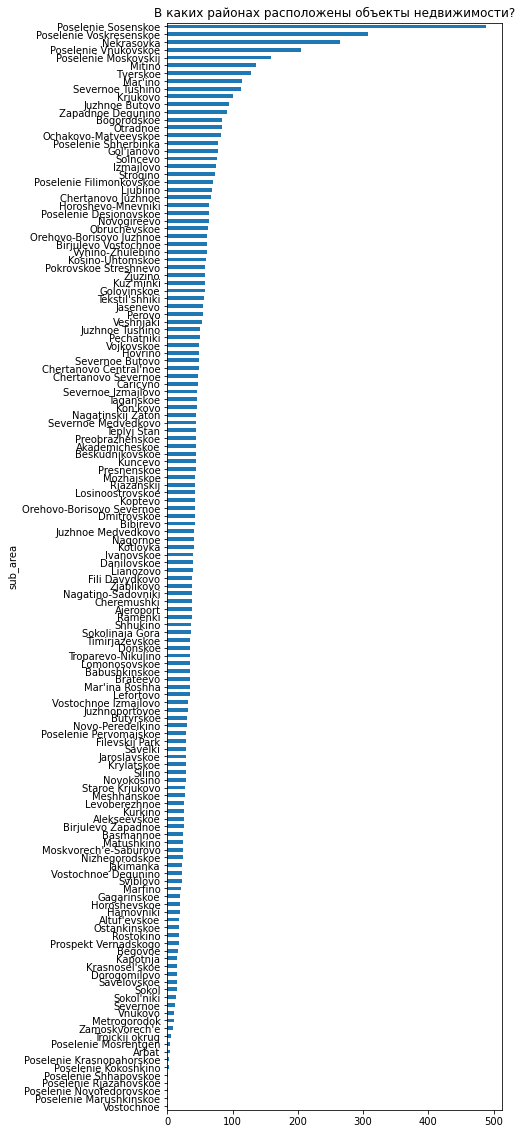

In [203]:
# посмотрим, в каких районах расположены объекты
train.groupby('sub_area').id.count().\
    sort_values().\
    plot(kind='barh', figsize=(6,20))
plt.title('В каких районах расположены объекты недвижимости?')
plt.show()

Самая большая площадь объекта недвижимости составляет 5,326 кв.м., самая маленькая - 5 кв.м.
Средняя площадь объекта недвижимости составляет 54 кв.м., медианная - 45 кв.м.


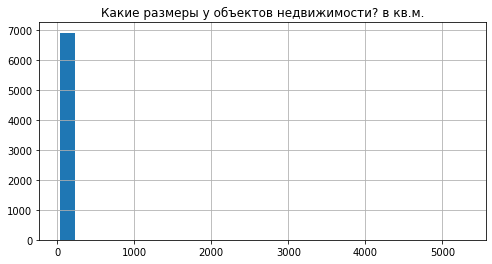

In [204]:
# Насколько большие продаваемые объекты по площади?
print('Самая большая площадь объекта недвижимости составляет {:,.0f} кв.м., самая маленькая - {:,.0f} кв.м.'.format(
    train.full_sq.max(), train.full_sq.min()))
print('Средняя площадь объекта недвижимости составляет {:,.0f} кв.м., медианная - {:,.0f} кв.м.'.format(
    train.full_sq.mean(), train.full_sq.median()))

train.full_sq.hist(bins=21, rwidth=.8, figsize=(8,4))
plt.title('Какие размеры у объектов недвижимости? в кв.м.')
plt.show()

Мы видим, что у нас большие выбросы что в цене, что в жилой площади, поэтому предлагается выкинуть что-то очень большое.

<AxesSubplot:xlabel='full_sq'>

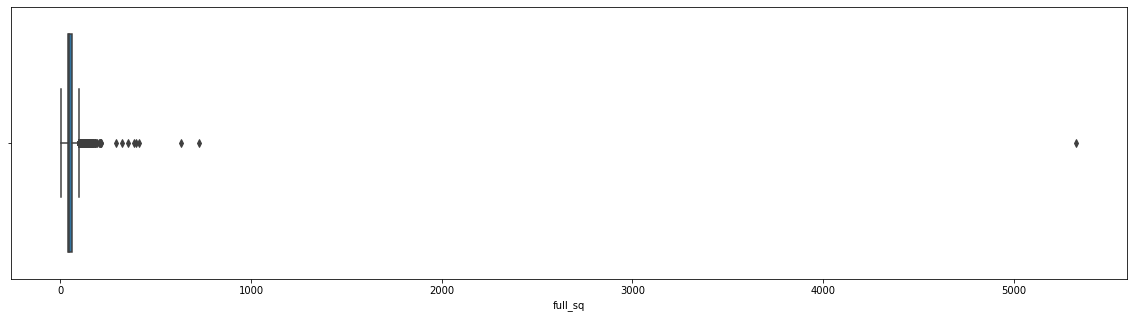

In [205]:
plt.subplots(figsize=(20,5))
sns.boxplot(x=train["full_sq"])

Возьмем объекты до 1000 кв.м.

In [206]:
train.shape

(6907, 249)

In [5]:
train = train[train['full_sq'] < 1000]
train.shape

(6906, 249)

<AxesSubplot:xlabel='full_sq'>

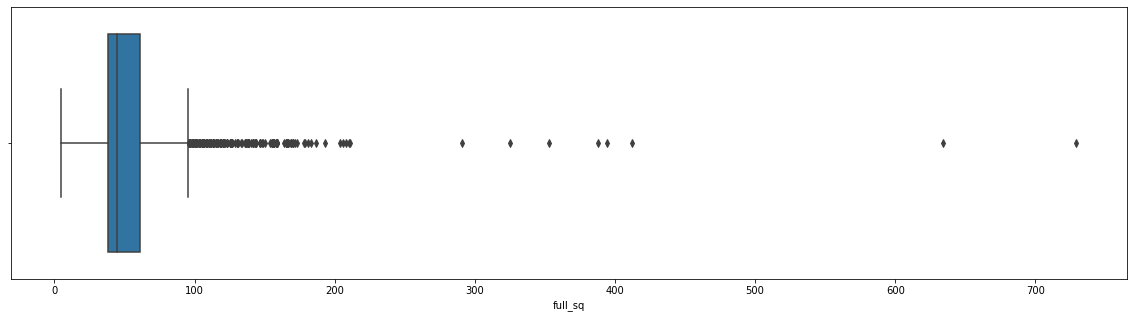

In [208]:
plt.subplots(figsize=(20,5))
sns.boxplot(x=train["full_sq"])

Судя по этому графику мы можем взять объекты площадью менее 250 кв.м.

In [6]:
train = train[train['full_sq'] < 250]
train.shape

(6898, 249)

Самая большая площадь объекта недвижимости составляет 211 кв.м., самая маленькая - 5 кв.м.
Средняя площадь объекта недвижимости составляет 52 кв.м., медианная - 45 кв.м.


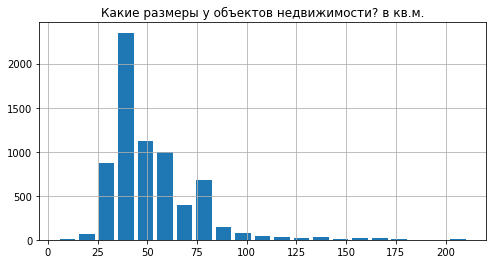

In [210]:
print('Самая большая площадь объекта недвижимости составляет {:,.0f} кв.м., самая маленькая - {:,.0f} кв.м.'.format(
    train.full_sq.max(), train.full_sq.min()))
print('Средняя площадь объекта недвижимости составляет {:,.0f} кв.м., медианная - {:,.0f} кв.м.'.format(
    train.full_sq.mean(), train.full_sq.median()))

train.full_sq.hist(bins=21, rwidth=.8, figsize=(8,4))
plt.title('Какие размеры у объектов недвижимости? в кв.м.')
plt.show()

После корректировки данных с учетом большой площади, посмотрим на изменившееся распределение по цене:

Самая низкая цена за объект недвижимости составляла 190,000 рублей, самая высокая - 111,111,112 рублей
Средняя цена за объект недвижимости составляла 6,332,047 рублей, медианная цена - 5,650,000 рублей


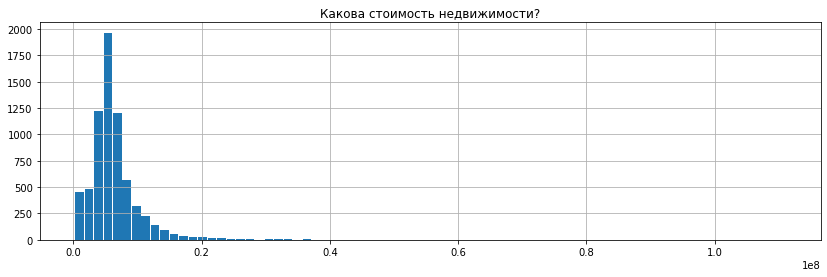

In [211]:
print('Самая низкая цена за объект недвижимости составляла {:,.0f} рублей, самая высокая - {:,.0f} рублей'.format(
    train.price_doc.min(), train.price_doc.max()))
print('Средняя цена за объект недвижимости составляла {:,.0f} рублей, медианная цена - {:,.0f} рублей'.format(
    train.price_doc.mean(), train.price_doc.median()))
train.price_doc.hist(bins=75, rwidth=.9, figsize=(14,4))
plt.title('Какова стоимость недвижимости?')
plt.show()

<AxesSubplot:xlabel='price_doc'>

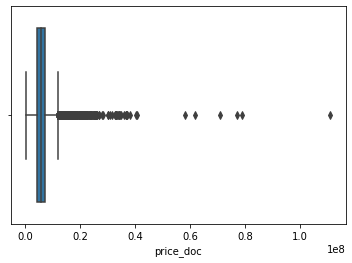

In [212]:
sns.boxplot(x=train["price_doc"])

Исходя из этого графика возьмём объекты стоимостью менее 50 млн.рублей.

In [7]:
train = train[train['price_doc'] < 50000000]
train.shape
# всего на 9 квартир меньше, а данные будут более показательные

(6891, 249)

In [214]:
print('Самая низкая цена за объект недвижимости составляла {:,.0f} рублей, самая высокая - {:,.0f} рублей'.format(
    train.price_doc.min(), train.price_doc.max()))
print('Средняя цена за объект недвижимости составляла {:,.0f} рублей, медианная цена - {:,.0f} рублей'.format(
    train.price_doc.mean(), train.price_doc.median()))
train.price_doc.hist(bins=75, rwidth=.9, figsize=(14,4))
plt.title('Какова стоимость недвижимости?')
plt.show()

Самая низкая цена за объект недвижимости составляла 190,000 рублей, самая высокая - 40,500,000 рублей
Средняя цена за объект недвижимости составляла 6,271,083 рублей, медианная цена - 5,650,000 рублей


Ясно, что чтобы оценивать стоимость жилья в зависимости от предоставленных параметров, нам необходимо посчитать стоимость квадратного метра.

In [8]:
train['price_per_sqm'] = train['price_doc']/train['full_sq']
train['price_per_sqm']

0       136046.511628
1       176470.588235
2       132558.139535
3       147191.011236
4       212096.779221
            ...      
6901    154285.714286
6902    154358.454545
6903    144736.842105
6904     84141.509434
6905     81686.278481
Name: price_per_sqm, Length: 6891, dtype: float64

<AxesSubplot:xlabel='price_per_sqm'>

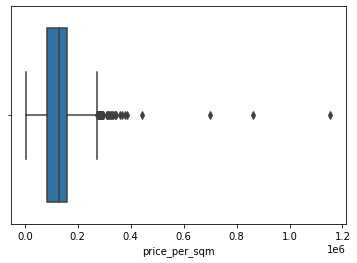

In [45]:
sns.boxplot(x=train["price_per_sqm"])

In [46]:
train = train[train['price_per_sqm'] < 300000]
train.shape

(6870, 250)

Будем анализировать только количественные переменные.

In [9]:
num_features = train.select_dtypes(include=['int64','float64']).columns # оставляем только количественные фичи
num_features = list(num_features.drop(['id','price_doc','price_per_sqm'])) # убираем столбец id и целевой столбец
num_features

['full_sq',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_education_centers_raion',
 'children_school',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all',
 'ekder_male',
 'ekder_female',
 '0_6_all',
 '0_6_male',
 '0_6_female',
 '7_14_all',
 '7_14_male',
 '7_14_female',
 '0_17_all',
 '0_17_male',
 '0_17_female',
 '16_29_all',
 '16_29_male',
 '16_29_female',
 '0_13_all',
 '0_13_male',
 '0_13_female',
 'ID_metro',
 'metro_min_avto',
 'metro_km_avto',
 'metro_min_walk',
 'metro_km_walk',
 'kindergarten_km',
 'school_km',
 'park_km',
 'green_zone_km',
 'industrial_km',
 'water_treatment_km',

Посмотрим на распределения количественных параметров.

In [218]:
f = pd.melt(train, value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.histplot, 'value', kde=True)

Посмотрим на корреляцию между каждой количественной переменной и переменной цены.

In [220]:
# Scatter plots of numerical features against SalePrice
f = pd.melt(train, id_vars=['price_per_sqm'], value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.regplot, 'value', 'price_per_sqm', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

Зависимость, в первую очередь, наблюдается между ценой и размером жилплощади, что закономерно и предсказуемо. Как ни странно, между объемом зеленой зоны в районе и ценой не наблюдается корреляции, а также обратной корреляции не наблюдается в соотношении цены и объема индустриальной зоны. Как и ожидалось, существует обратная корреляция между временем до метро/до остановки общественного транспорта и ценой.

Посмотрим на корреляцию по каждому параметру по отношению к цене. По умолчанию корреляция считается по Пирсону, но поскольку у нас несимметричное распределение, посчитаем по Кендаллу.

In [47]:
train[train.columns[1:]].corr(method='kendall')['price_per_sqm'][:].sort_values(ascending=False).to_frame().head(40)

price_per_sqm
price_per_sqm                    1.000000
price_doc                        0.522351
cafe_count_3000                  0.357869
cafe_count_2000                  0.357624
cafe_count_1500                  0.346554
cafe_count_3000_price_1000       0.346158
cafe_count_3000_price_1500       0.344651
cafe_count_2000_price_1000       0.341799
cafe_count_3000_price_500        0.340286
office_count_3000                0.340272
office_count_5000                0.337039
cafe_count_2000_price_500        0.336438
sport_count_3000                 0.334770
cafe_count_2000_price_1500       0.334615
sport_count_2000                 0.332234
cafe_count_5000_price_500        0.331756
cafe_count_1500_price_1000       0.331195
cafe_count_5000_price_2500       0.330413
cafe_count_1000                  0.329674
cafe_count_5000                  0.327602
office_sqm_3000                  0.327065
cafe_count_3000_price_2500       0.327047
cafe_count_2000_price_2500       0.325657
cafe_count_5000_price_1500       0.325304
office_sqm_5000                  0.323624
sport_count_5000                 0.322668
cafe_count_5000_price_1000       0.322566
cafe_count_1500_price_500        0.320265
cafe_count_3000_na_price         0.319502
cafe_count_1500_price_1500       0.319447
trc_count_3000                   0.317303
trc_count_5000                   0.316380
office_count_2000                0.314033
sport_count_1500                 0.313997
cafe_count_5000_na_price         0.310922
cafe_count_2000_na_price         0.305091
leisure_count_5000               0.300192
big_church_count_5000            0.299168
cafe_count_1000_price_1000       0.298715
trc_count_2000                   0.297203

In [48]:
train[train.columns[1:]].corr(method='kendall')['price_per_sqm'][:].sort_values(ascending=False).to_frame().tail(40)

price_per_sqm
railroad_station_avto_min              -0.170593
preschool_km                           -0.170933
full_sq                                -0.173187
public_transport_station_min_walk      -0.175080
public_transport_station_km            -0.175080
school_km                              -0.181481
ts_km                                  -0.187389
bus_terminal_avto_km                   -0.189228
hospice_morgue_km                      -0.193969
park_km                                -0.208710
kindergarten_km                        -0.212065
area_m                                 -0.220371
radiation_km                           -0.222994
metro_min_avto                         -0.223788
museum_km                              -0.225290
fitness_km                             -0.226720
shopping_centers_km                    -0.229454
metro_km_avto                          -0.229641
metro_km_walk                          -0.230155
metro_min_walk                         -0.230155
market_shop_km                         -0.230243
big_church_km                          -0.240685
theater_km                             -0.241317
detention_facility_km                  -0.243276
thermal_power_plant_km                 -0.244001
catering_km                            -0.251015
swim_pool_km                           -0.252241
nuclear_reactor_km                     -0.260172
exhibition_km                          -0.264321
office_km                              -0.265883
workplaces_km                          -0.266089
public_healthcare_km                   -0.267239
basketball_km                          -0.281195
university_km                          -0.288007
stadium_km                             -0.293870
zd_vokzaly_avto_km                     -0.312855
bulvar_ring_km                         -0.316978
ttk_km                                 -0.320789
sadovoe_km                             -0.321417
kremlin_km                             -0.321871

In [ ]:
# Kendall's tau-B values:
# Less than + or - 0.10: very weak
# + or -0.10 to 0.19: weak
# + or - 0.20 to 0.29: moderate
# + or - 0.30 or above: strong

Выберем 5 фичей с наибольшим коэффициентом и 5 фичей с наибольшим по модулю отрицательным коэффициентом, но не будем брать те которые очевидно из названия слишком похожи между собой (например, cafe_count_5000_price_1000 и cafe_count_5000_price_1500).

 Оставим для анализа только 10 выбранных параметров и посмотрим на их корреляцию между собой.

In [10]:
num_features = ['cafe_count_3000',\
'office_count_3000',\
'sport_count_3000',\
'trc_count_3000',\
'leisure_count_5000',\
'kremlin_km',\
'ttk_km',\
'zd_vokzaly_avto_km',\
'stadium_km',\
'university_km']

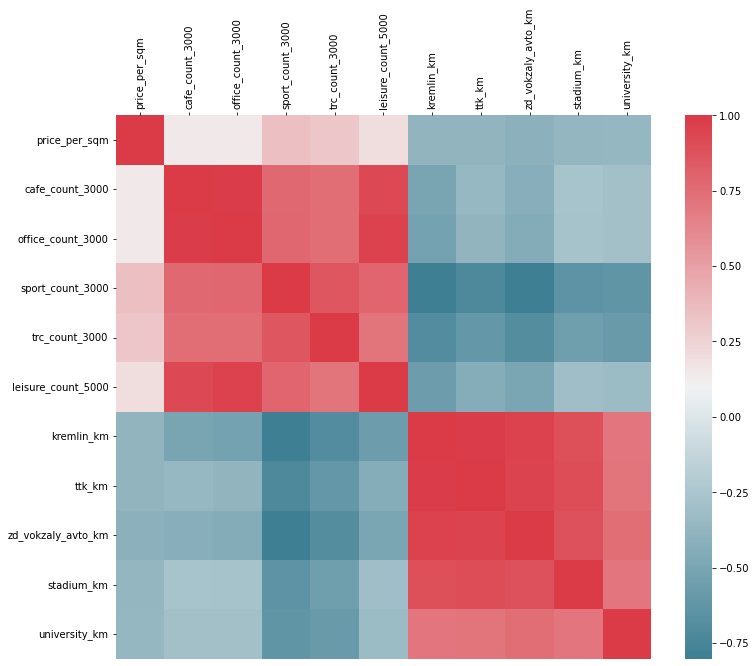

In [12]:
corr = train[['price_per_sqm'] + num_features].corr()
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.index.values,
           cmap=cmap)
ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

Достаточно много признаков зависят между собой.

Подготовим данные для модели на выбранных параметрах.

In [49]:
X = train[num_features]
X

cafe_count_3000  office_count_3000  sport_count_3000  trc_count_3000  \
0                68.0               12.0              21.0            23.0   
1                30.0               12.0              19.0            14.0   
2                41.0                8.0              20.0             7.0   
3                32.0                4.0              18.0            12.0   
4              1068.0              305.0              77.0            60.0   
...               ...                ...               ...             ...   
6901             42.0               11.0              33.0             6.0   
6902             74.0                7.0              24.0            16.0   
6903             74.0               32.0              28.0            20.0   
6904             45.0                8.0              21.0            21.0   
6905              3.0                0.0               1.0             2.0   

      leisure_count_5000  kremlin_km     ttk_km  zd_vokzaly_avto_km  \
0                    0.0   15.156211  10.918587           14.231961   
1                   10.0    8.698054   3.103996            9.242586   
2                    4.0    9.067885   2.927487            9.540544   
3                    0.0   19.487005  14.606501           17.478380   
4                   91.0    2.578671   1.721834            1.595898   
...                  ...         ...        ...                 ...   
6901                 9.0   10.066627   5.042467           10.531600   
6902                 1.0   15.378836  10.624808           14.254331   
6903                13.0    7.965604   2.970003            7.123955   
6904                 1.0   16.933422  12.098658           14.272983   
6905                 0.0   19.763938  13.645008           25.256469   

      stadium_km  university_km  
0       8.148591       6.715026  
1       6.127073       1.852560  
2       0.767569       0.841254  
3       7.385521      10.903161  
4       3.610754       0.991683  
...          ...            ...  
6901    2.269290       4.025611  
6902    3.931453       7.679112  
6903    4.008442       1.724375  
6904    4.180124       7.697764  
6905   13.430703       8.900627  

[6870 rows x 10 columns]

In [50]:
y = train['price_per_sqm']
y

0       136046.511628
1       176470.588235
2       132558.139535
3       147191.011236
4       212096.779221
            ...      
6901    154285.714286
6902    154358.454545
6903    144736.842105
6904     84141.509434
6905     81686.278481
Name: price_per_sqm, Length: 6870, dtype: float64

In [51]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression() # создаем класс
reg.fit(X, y)

LinearRegression()

In [52]:
y_pred = reg.predict(X)

In [53]:
y_pred

array([130171.75097004, 139596.79125752, 135860.99455947, ...,
       146533.36994365, 137155.29769438,  97477.59131332])

In [54]:
from sklearn.metrics import r2_score
full_score = r2_score(y, y_pred)
full_score

0.22072582745989688

Попробуем посчитать регрессию, последовательно убирая один параметр, а дальше посчитаем разницу между r2 полной модели и модели без одного параметра. Проранжируем параметры от наиболее влияющих на r2 (разница в r2 при удалении параметра самая большая) до наименее влияющих.

In [55]:
d = {'parameter': [], 'r2_difference':[]}
for parameter in num_features:
    X_3 = X.drop(labels=[parameter], axis=1)
    reg.fit(X_3, y)
    y_pred_3 = reg.predict(X_3)
    d['parameter'].append(parameter)
    d['r2_difference'].append(full_score - r2_score(y, y_pred_3))
d
df = pd.DataFrame(data=d)
df.sort_values(by=['r2_difference'], ascending=False)

parameter  r2_difference
4  leisure_count_5000       0.009422
3      trc_count_3000       0.007441
1   office_count_3000       0.004992
2    sport_count_3000       0.003320
7  zd_vokzaly_avto_km       0.002408
8          stadium_km       0.001453
5          kremlin_km       0.001341
9       university_km       0.001280
6              ttk_km       0.001044
0     cafe_count_3000       0.000289

Тут я попробовала нормализовать изначальные данные, чтобы понять, влияет ли это на результат, но оказалось, что совершенно не влияет.

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_4 = scaler.fit_transform(X)
reg.fit(X_4, y)
y_pred_4 = reg.predict(X_4)
r2_score(y, y_pred_4)

0.22072582745989688

In [57]:
reg.fit(X, y)
y_pred = reg.predict(X)
r2_score(y, y_pred)

0.22072582745989688

Посчитаем модель только на параметре full_sq.

In [58]:
reg.fit(X['leisure_count_5000'].to_numpy().reshape(-1, 1), y)
y_pred_4 = reg.predict(X['leisure_count_5000'].to_numpy().reshape(-1, 1))
r2_score(y, y_pred_4)

0.03188520143725726

<AxesSubplot:xlabel='price_per_sqm', ylabel='Count'>

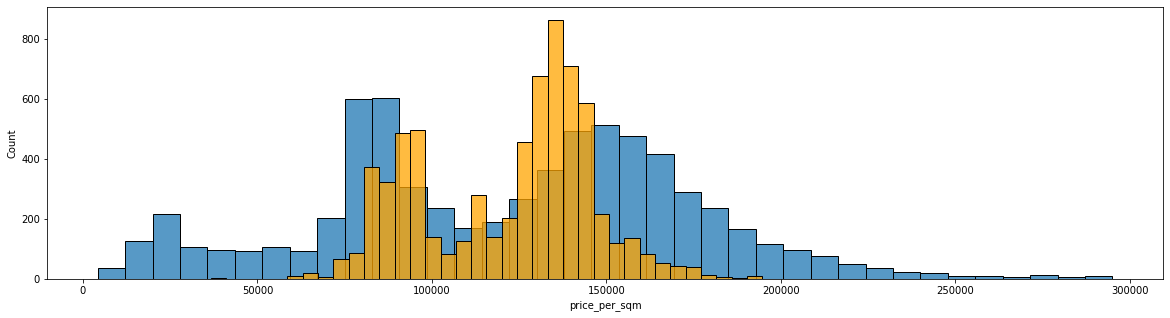

In [60]:
plt.subplots(figsize=(20,5))
sns.histplot(y)
sns.histplot(y_pred, color="orange")

А ну если мы возьмем ВСЕ численные параметры, и посчитаем регрессию для цены за кв.м. по ним.

In [82]:
plt.subplots(figsize=(20,5))
train = pd.read_csv('sber.csv')
for column in train.columns:
    if train[column].isnull().sum()>1:
        train.drop(column, inplace=True, axis=1)
train['price_per_sqm'] = train['price_doc']/train['full_sq']
sns.boxplot(x=train["price_per_sqm"])

<AxesSubplot:xlabel='price_per_sqm'>

In [83]:
train = train[train['price_per_sqm'] < 275000]
train.shape

(6859, 248)

<AxesSubplot:xlabel='price_per_sqm'>

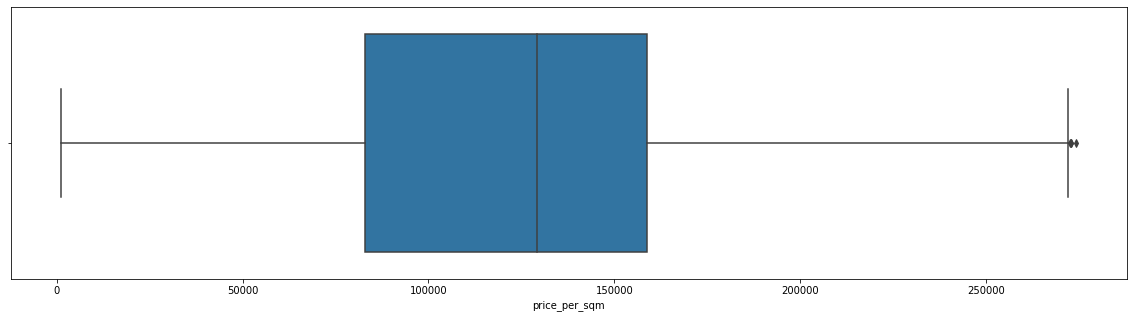

In [84]:
plt.subplots(figsize=(20,5))
sns.boxplot(x=train["price_per_sqm"])

In [85]:
num_features = train.select_dtypes(include=['int64','float64']).columns # оставляем только количественные фичи
num_features = list(num_features.drop(['id','price_doc','price_per_sqm'])) # убираем столбец id и целевой столбец
num_features

['full_sq',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_education_centers_raion',
 'children_school',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all',
 'ekder_male',
 'ekder_female',
 '0_6_all',
 '0_6_male',
 '0_6_female',
 '7_14_all',
 '7_14_male',
 '7_14_female',
 '0_17_all',
 '0_17_male',
 '0_17_female',
 '16_29_all',
 '16_29_male',
 '16_29_female',
 '0_13_all',
 '0_13_male',
 '0_13_female',
 'ID_metro',
 'metro_min_avto',
 'metro_km_avto',
 'metro_min_walk',
 'metro_km_walk',
 'kindergarten_km',
 'school_km',
 'park_km',
 'green_zone_km',
 'industrial_km',
 'water_treatment_km',

In [86]:
X_full = train[num_features]
X_full

full_sq        area_m  raion_popul  green_zone_part  indust_part  \
0          43  6.407578e+06       155572         0.189727     0.000070   
1          34  9.589337e+06       115352         0.372602     0.049637   
2          43  4.808270e+06       101708         0.112560     0.118537   
3          89  1.258354e+07       178473         0.194703     0.069753   
4          77  8.398461e+06       108171         0.015234     0.037316   
...       ...           ...          ...              ...          ...   
6901       35  9.946335e+06       139322         0.065409     0.225825   
6902       88  9.249237e+06       156377         0.374068     0.000000   
6903       76  7.750778e+06        76284         0.094681     0.313925   
6904      106  1.258354e+07       178473         0.194703     0.069753   
6905       79  1.139168e+07        19940         0.055644     0.243205   

      children_preschool  preschool_education_centers_raion  children_school  \
0                   9576                                  5            10309   
1                   6880                                  5             7759   
2                   5879                                  4             6207   
3                  13087                                  9            13670   
4                   5706                                  7             6748   
...                  ...                                ...              ...   
6901                6400                                  7             6558   
6902               10190                                  5            11319   
6903                4935                                  4             4625   
6904               13087                                  9            13670   
6905                1706                                  5             1564   

      school_education_centers_raion  school_education_centers_top_20_raion  \
0                                  5                                      0   
1                                  8                                      0   
2                                  7                                      0   
3                                 10                                      0   
4                                  9                                      0   
...                              ...                                    ...   
6901                               7                                      0   
6902                               5                                      0   
6903                               6                                      0   
6904                              10                                      0   
6905                               5                                      0   

      ...  cafe_count_5000_price_1500  cafe_count_5000_price_2500  \
0     ...                        40.0                         9.0   
1     ...                        36.0                        15.0   
2     ...                        25.0                        10.0   
3     ...                        15.0                        11.0   
4     ...                       552.0                       319.0   
...   ...                         ...                         ...   
6901  ...                        27.0                         8.0   
6902  ...                        38.0                        14.0   
6903  ...                        71.0                        33.0   
6904  ...                        29.0                        13.0   
6905  ...                         6.0                         1.0   

      cafe_count_5000_price_4000  cafe_count_5000_price_high  \
0                            4.0                         0.0   
1                            3.0                         0.0   
2                            3.0                         0.0   
3                            2.0                         1.0   
4                          108.0                        17

In [87]:
y = train['price_per_sqm']

In [88]:
reg.fit(X_full, y)
y_pred_full = reg.predict(X_full)
r2_score(y, y_pred_full)

0.3287348105962056

<AxesSubplot:xlabel='price_per_sqm', ylabel='Count'>

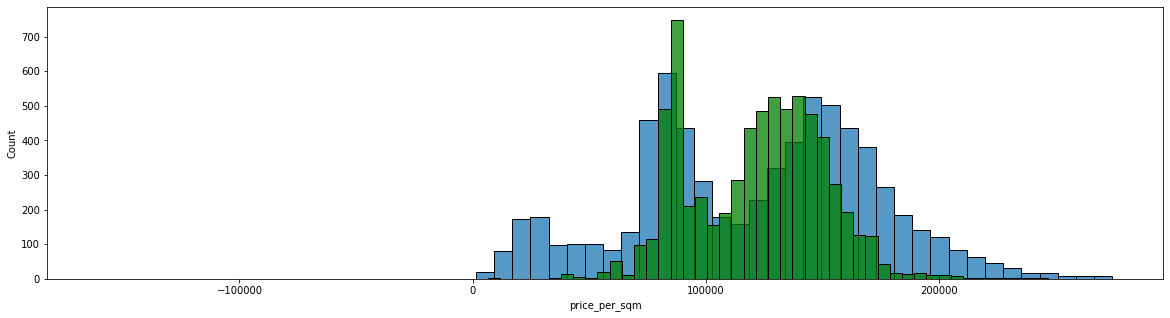

In [92]:
plt.subplots(figsize=(20,5))
sns.histplot(y)
sns.histplot(y_pred_full, color="green")

Это спрогнозированное распределение чуть больше похоже на распределение настоящей величины.

Таким образом, мы делаем вывод, что явных определяющих параметров нет в данном исследовании, каждый параметр вносит небольшой вклад, какие-то больше, какие-то меньше.

Посчитала разницу между фактической величиной и спрогнозированной, вывела распределение, на нормальное оно не похоже...

In [90]:
diff = y - y_pred_full
diff

0        4206.770622
1        2542.162764
2       -9559.993583
3       11664.103987
4       13621.699055
            ...     
6901    22289.168842
6902     4719.960831
6903     2840.933490
6904   -35201.814461
6905    -6440.516914
Name: price_per_sqm, Length: 6859, dtype: float64

<AxesSubplot:xlabel='price_per_sqm', ylabel='Count'>

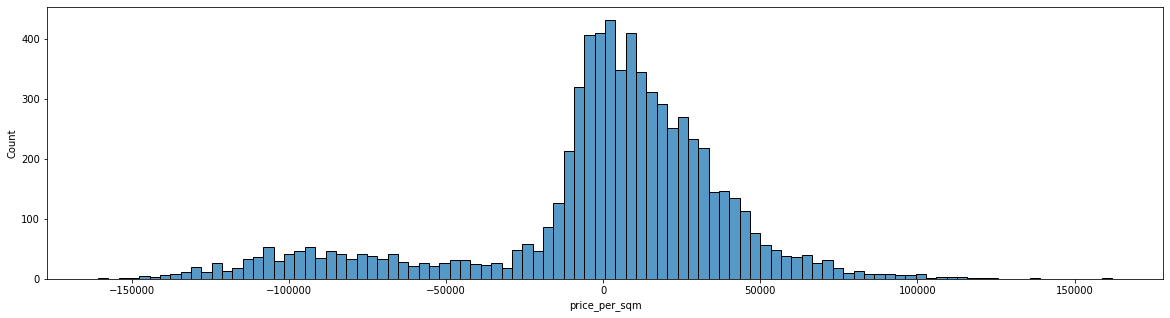

In [91]:
plt.subplots(figsize=(20,5))
sns.histplot(diff)